In [1]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

%matplotlib inline

In [2]:
base_dir = 'data/raw'
os.listdir(base_dir)

['salts_water_basic_IR_baseline.csv',
 'salts_water_basic_output_i.csv',
 'salts_water_basic_IR.csv',
 'salts_water_basic_output_s.csv',
 'salts_water_basic_OA.csv']

In [3]:
filename = 'salts_water_basic_OA.csv'
df = pd.read_csv(f'{base_dir}/{filename}')
df.head()

,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,...,1091.0,1092.0,1093.0,1094.0,1095.0,1096.0,1097.0,1098.0,1099.0,1100.0
0,2.7115,2.9593,3.0339,3.3297,3.2065,3.30560,3.22720,3.28420,3.38690,3.33040,...,0.000641,0.000763,0.000351,0.000671,0.000900,0.000488,0.000748,0.000671,0.000534,0.000900
1,2.9078,2.9396,2.8984,3.1246,3.3011,3.17920,3.32760,3.37530,3.35000,3.41740,...,0.000290,0.000305,-0.000076,0.000183,0.000412,-0.000046,0.000229,0.000198,0.000061,0.000458
2,2.8516,3.4251,3.1201,3.1306,3.1346,3.45920,3.30900,3.40450,3.67110,3.53670,...,0.001130,0.001140,0.000763,0.001020,0.001220,0.000809,0.001130,0.001010,0.000900,0.001390
3,2.6598,3.2798,3.0815,3.2515,3.6696,3.40710,3.71290,3.51930,3.44000,3.54950,...,0.000381,0.000366,0.000030,0.000336,0.000565,0.000107,0.000443,0.000290,0.000198,0.000549
4,1.8138,1.6950,1.4765,1.2387,1.0456,0.87405,0.73227,0.60864,0.50514,0.42422,...,0.038770,0.039000,0.038770,0.039250,0.039690,0.039440,0.039960,0.040050,0.040130,0.040590


In [4]:
filename = 'salts_water_basic_output_i.csv'
outputs = pd.read_csv(f'{base_dir}/{filename}')
outputs = outputs.drop(index=[0])
outputs.index -=1
outputs = outputs.sort_index()
outputs.head()

,Zn,Cu,Li,Fe,Ni,NH4,SO4,NO3
0,0.0,0.0,0.0,0.0,0.0000,0.1452,0.05005,0.0451
1,0.0,0.0,0.0,0.0,0.0000,0.2904,0.10010,0.0902
2,0.0,0.0,0.0,0.0,0.0000,0.4356,0.15015,0.1353
3,0.0,0.0,0.0,0.0,0.0000,0.5808,0.20020,0.1804
4,0.0,0.0,0.0,0.0,0.2431,0.0000,0.24310,0.0000


In [5]:
df.shape, outputs.shape

((3744, 911), (3744, 8))

In [6]:
x = np.array(df.columns)
x = np.apply_along_axis(lambda el: np.float64(el), 0, x)
x.shape

(911,)

4.0 0.000656


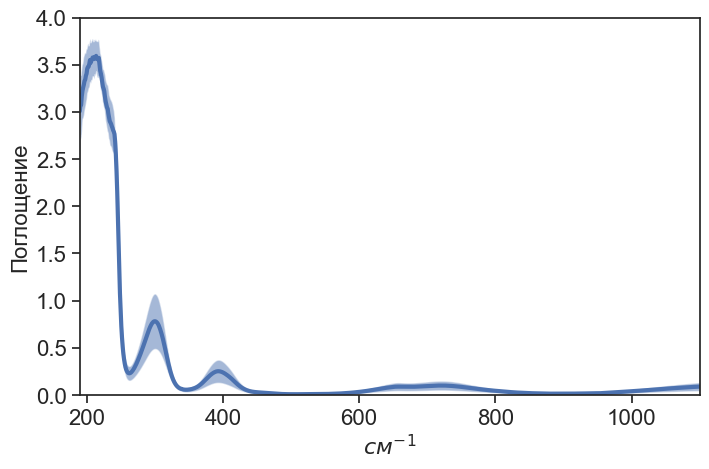

In [22]:
cations = (outputs['Zn'] == 0) & \
            (outputs['Cu'] == 0) & \
            (outputs['Li'] == 0) & \
            (outputs['Fe'] == 0) & \
            (outputs['Ni'] == 0) & \
            (outputs['NH4'] == 0)


y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
print(y.max().max(), y.min().min())

plt.figure(figsize=(8, 5), dpi=100)
plt.plot(x, mean, linewidth=3) 
plt.fill_between(x, y1, y2, alpha=0.5)

plt.ylim([0., 4])
plt.xlim([x[0], x[-1]])
#plt.legend(fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('$см^{-1}$', fontsize=16)
plt.ylabel('Поглощение', fontsize=16)

plt.savefig('images/oa/Zn-Li-Ni-NH4.jpeg', dpi=100, format='jpeg')
plt.show()

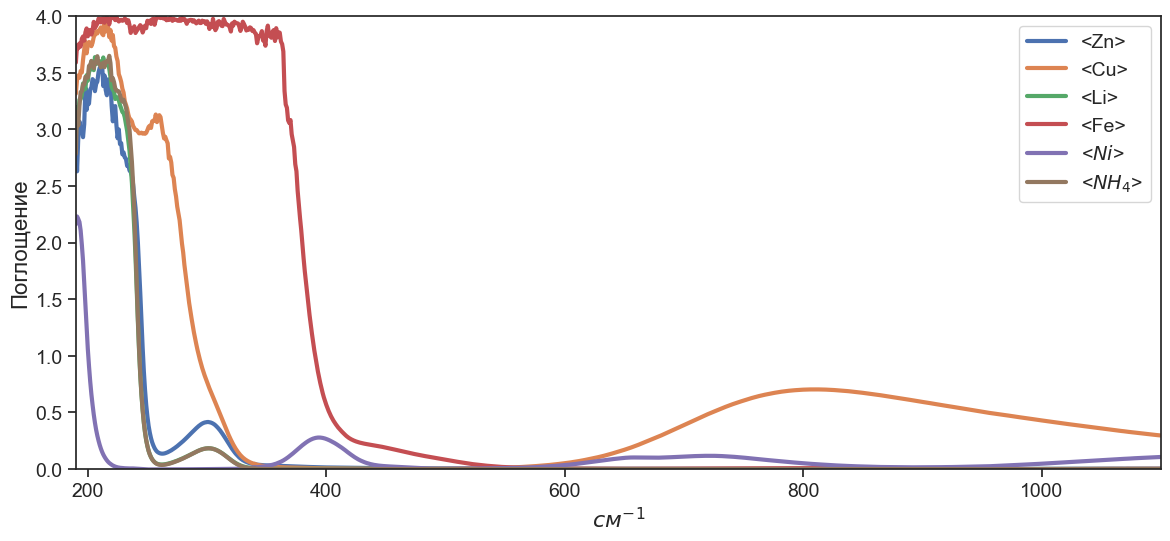

In [32]:
plt.figure(figsize=(14, 6), dpi=100)

cations = (outputs['Zn'] != 0) & \
            (outputs['Cu'] == 0) & \
            (outputs['Li'] == 0) & \
            (outputs['Fe'] == 0) & \
            (outputs['Ni'] == 0) & \
            (outputs['NH4'] == 0)
y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Zn>',linewidth=3) 
#plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & \
            (outputs['Cu'] != 0) & \
            (outputs['Li'] == 0) & \
            (outputs['Fe'] == 0) & \
            (outputs['Ni'] == 0) & \
            (outputs['NH4'] == 0)
y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Cu>',linewidth=3) 
#plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & \
            (outputs['Cu'] == 0) & \
            (outputs['Li'] != 0) & \
            (outputs['Fe'] == 0) & \
            (outputs['Ni'] == 0) & \
            (outputs['NH4'] == 0)
y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Li>',linewidth=3) 
#plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & \
            (outputs['Cu'] == 0) & \
            (outputs['Li'] == 0) & \
            (outputs['Fe'] != 0) & \
            (outputs['Ni'] == 0) & \
            (outputs['NH4'] == 0)
y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Fe>',linewidth=3) 
#plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & \
            (outputs['Cu'] == 0) & \
            (outputs['Li'] == 0) & \
            (outputs['Fe'] == 0) & \
            (outputs['Ni'] != 0) & \
            (outputs['NH4'] == 0)
y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<$Ni$>', linewidth=3) 
#plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & \
            (outputs['Cu'] == 0) & \
            (outputs['Li'] == 0) & \
            (outputs['Fe'] == 0) & \
            (outputs['Ni'] == 0) & \
            (outputs['NH4'] != 0)
y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<$NH_4$>', linewidth=3) 
#plt.fill_between(x, y1, y2, alpha=0.1)

#plt.plot(x, baseline.mean(), label='$H_2O$', linewidth=2)


plt.ylim([0.00, 4])
plt.xlim([x[0], x[-1]])
plt.legend(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('$см^{-1}$', fontsize=16)
plt.ylabel('Поглощение', fontsize=16)

#plt.title(f'Сравнение средних спекторов ИК однокомпонентных растворов',fontsize=18)
plt.savefig('./images/oa/solutions_comparing.jpeg', dpi=500, format='jpeg')
plt.show()

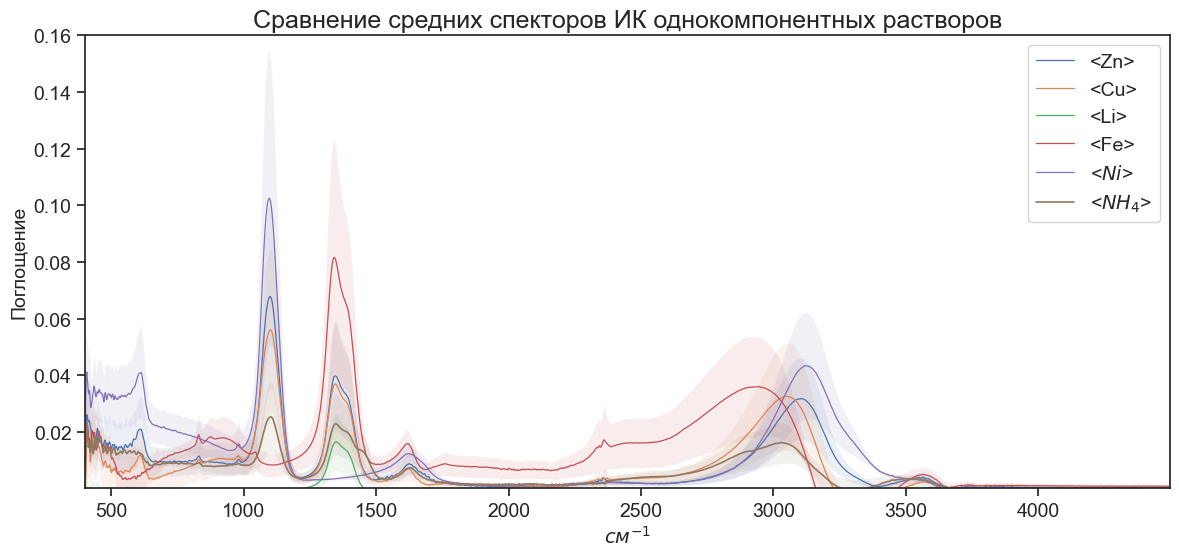

In [129]:
plt.figure(figsize=(14, 6), dpi=100)
base = baseline.mean().values

cations = (outputs['Zn'] != 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Fe'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
y = df[cations] - base
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Zn>',linewidth=0.9) 
plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] != 0) & (outputs['Li'] == 0) & (outputs['Fe'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
y = df[cations]- base
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Cu>',linewidth=0.9) 
plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] != 0) & (outputs['Fe'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
y = df[cations]- base
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Li>',linewidth=0.9) 
plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Fe'] != 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
y = df[cations]- base
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Fe>',linewidth=0.9) 
plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Fe'] == 0) & (outputs['Ni'] != 0) & (outputs['NH4'] == 0)
y = df[cations]- base
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<$Ni$>', linewidth=0.9) 
plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Fe'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] != 0)
y = df[cations]- base
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<$NH_4$>', linewidth=1.2) 
plt.fill_between(x, y1, y2, alpha=0.1)

#plt.plot(x, baseline.mean(), label='$H_2O$', linewidth=2)


plt.ylim([0.0001, 0.16])
plt.xlim([x[-1], x[0]])
plt.legend(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('$см^{-1}$', fontsize=14)
plt.ylabel('Поглощение', fontsize=14)

plt.title(f'Сравнение средних спекторов ИК однокомпонентных растворов',fontsize=18)
plt.savefig('./images/ir/solutions_comparing3.jpeg', dpi=300, format='jpeg')
plt.show()

In [119]:
baseline.mean()

4497.45     0.001206
4495.521    0.001210
4493.593    0.001230
4491.664    0.001257
4489.735    0.001258
              ...   
406.93      0.516788
405.002     0.519528
403.073     0.525524
401.145     0.534106
399.216     0.538770
Length: 2126, dtype: float64